<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/ERAP_R_Course_ModuloII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Título**:  Manipulación de datos con R  - Módulo II (Manejo de datos desordenados y falta de información )                               
                                          
**Autor(es)**:  Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Fecha**: 2025-06

**Institución**: Universidad de La Rioja    

# ¿Qué son los datos faltantes (Missing Data)?

En R, los valores no disponibles o faltantes se representan con NA (Not Available en inglés) y pueden surgir por múltiples motivos:

- errores de registro
- fallos de instrumentos
- no respuesta en encuestas
- entre otros.

(Little & Rubin, 2002): los autores insisten en que el manejo de datos faltantes debe hacerse cuidadosamente porque puede comprometer la validez del análisis estadístico.

Bibliografía:

  Little, Roderick J. A, and Donald B Rubin. Statistical Analysis with Missing Data. Third edition. vol. 793. Newark: Wiley, 2020. Print.


**¿Cómo afectan los datos faltantes a las operaciones básicas?**

Los valores NA en R representan información que no está disponible o que no pudo ser medida. Su presencia puede tener efectos importantes y silenciosos en cálculos básicos si no se gestionan adecuadamente.

In [54]:
x <- c(5, 8, NA, 10)
mean(x)       # Resultado: NA
sum(x)        # Resultado: NA
sd(x)         # Resultado: NA

[1] NA

[1] NA

[1] NA

**¿Por qué?**
R considera que si hay un NA, no puede estar seguro del resultado total. Prefiere devolver NA como advertencia de que el cálculo está incompleto.
Por lo tanto, existe el atributo que nos ayuda con esto:

```
na.rm=TRUE
```





In [55]:
mean(x, na.rm = TRUE)  # Resultado: 7.666...
sum(x, na.rm = TRUE)   # Resultado: 23
sd(x, na.rm = TRUE)    # Resultado: Desviación estándar de los valores observados

[1] 7.666667

[1] 23

[1] 2.516611

**Funciones lógicas y filtros**
Las expresiones lógicas que involucran NA también pueden dar resultados inesperados:

In [56]:
x <- c(1, 2, NA, 4)
x > 2

[1] FALSE FALSE    NA  TRUE

Si luego ejecutamos la siguiente línea

In [57]:
x[x > 2]



[1] NA  4

Funciones agregadas por grupo **(aggregate, group_by + summarise)**

En dplyr, ocurre lo mismo:

In [58]:
library(dplyr)

df <- data.frame(grupo = c("A", "A", "B", "B"), valor = c(10, NA, 5, 8))

df %>%
  group_by(grupo) %>%
  summarise(media = mean(valor))  # Resultado: NA para grupo A (el que contiene NAs)

df %>%
  group_by(grupo) %>%
  summarise(media = mean(valor, na.rm = TRUE))  # Ignora los NA correctamente


grupo,media
<chr>,<dbl>
A,NA
B,6.5


grupo,media
<chr>,<dbl>
A,10.0
B,6.5


**Modelado estadístico (regresiones, clustering, PCA...)**

Los modelos no se ajustan correctamente, o no representan la veracidad si no se gestionan los NA:

,x,y
,<dbl>,<dbl>
1,44.39524,280.0442
2,47.69823,313.1211
3,65.58708,423.3557
4,50.70508,325.4125
5,51.29288,321.9843
6,67.15065,435.9389


       x               y        
 Min.   :26.91   Min.   :175.7  
 1st Qu.:45.33   1st Qu.:294.0  
 Median :50.71   Median :328.9  
 Mean   :51.03   Mean   :329.6  
 3rd Qu.:57.80   3rd Qu.:366.4  
 Max.   :71.87   Max.   :474.4  
 NA's   :15                     

x  y 
15  0


Call:
lm(formula = y ~ x, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.505  -7.482  -0.851   6.275  40.020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0486     6.7772   0.155    0.877    
x             6.4453     0.1307  49.307   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11 on 83 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.967,	Adjusted R-squared:  0.9666 
F-statistic:  2431 on 1 and 83 DF,  p-value: < 2.2e-16


[1] 100

[1] 85


Call:
lm(formula = y ~ x, data = datos_imputados)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.702   -8.280   -0.612    7.721  118.220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.6507    15.2899   0.043    0.966    
x             6.4453     0.2956  21.804   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.89 on 98 degrees of freedom
Multiple R-squared:  0.8291,	Adjusted R-squared:  0.8273 
F-statistic: 475.4 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 100

[1] 100

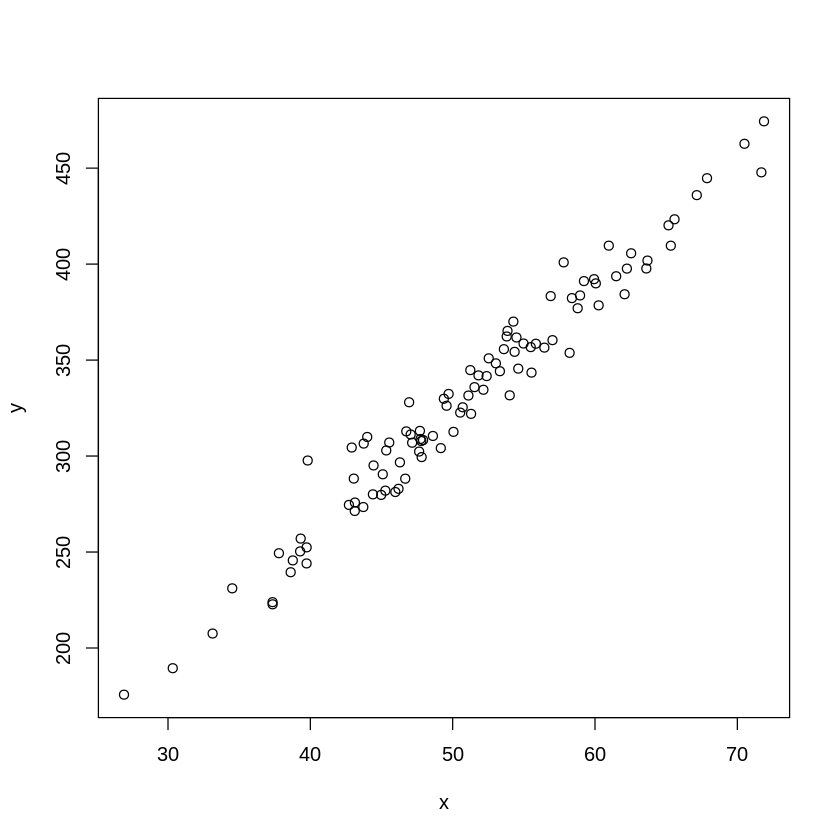

In [59]:
set.seed(123)  # Para reproducibilidad

# Generar 100 observaciones
n <- 100
x <- rnorm(n, mean = 50, sd = 10)          # Variable predictora
y <- 6.5 * x + rnorm(n, mean = 0, sd = 12) # Variable respuesta con ruido

plot(x,y)

datos <- data.frame(x = x, y = y)
head(datos)

# Introducir NA aleatoriamente en 15 valores de x
na_indices <- sample(1:n, size = 15)
datos$x[na_indices] <- NA

summary(datos)
colSums(is.na(datos))

#Intentamos ajustar el modelo
modelo_con_na <- lm(y ~ x, data = datos)
summary(modelo_con_na)

#R ajusta el modelo usando solo las filas donde y no es NA (complete-case analysis).

#Comprobémoslo:
nrow(datos)                # 100 observaciones originales
nrow(modelo_con_na$model)  # Solo 85 filas usadas (15 con NA en x)

#Miremos que pasa con el modelo al imputar, por ejemplo con la media
datos_imputados <- datos
datos_imputados$x[is.na(datos_imputados$x)] <- mean(datos$x, na.rm = TRUE)

modelo_imputado <- lm(y ~ x, data = datos_imputados)
summary(modelo_imputado)

nrow(datos_imputados)                # 100 observaciones originales
nrow(modelo_imputado$model)  # Solo 85 filas usadas (15 con NA en x)




## Detección y diagnóstico de valores faltantes

**¿por qué es tan crítico?**
Un solo NA sin tratar puede hacer que todo un análisis falle o se distorsione.

Los datos faltantes deben ser detectados, visualizados y tratados adecuadamente.

El primer paso siempre debe ser saber si alguna(s) de la(s) variables(s) contiene datos faltantes, para esto contamos con muchas herramientas, veremos algunas de ellas:

In [60]:
#install.packages("naniar")
## Instalar paquetes de visualización de datos faltantes
#install.packages("visdat")
#install.packages("VIM")
## Instalar paquete en desarrollo de estimación de datos faltantes
#install.packages("remotes")
#remotes::install_github("davidbiol/empire")

library(naniar)
library(VIM)

Métodos para detectar NAs.

In [61]:
print("----- Para ver si hay NA --------")

summary(datos)

print("---- Número total de NA ---------")

sum(is.na(datos))

print("----- Número de NA por columna --------")

colSums(is.na(datos))

print("---- Número de NA por fila ---------")

rowSums(is.na(datos))

print("--- Devuelve TRUE si hay al menos un NA en el data.frame. Es la forma más rápida y directa. ----------")

anyNA(datos)

print("---- Devuelve una matriz lógica del mismo tamaño que datos, indicando con TRUE dónde hay NA. ---------")

is.na(datos)

print("---- Devuelve un vector lógico que indica qué filas no tienen ningún NA. Puedes usarlo para filtrar: ---------")

complete.cases(datos)

print("---- Muestra número y porcentaje de NA por fila ---------")

miss_case_summary(datos)







[1] "----- Para ver si hay NA --------"


       x               y        
 Min.   :26.91   Min.   :175.7  
 1st Qu.:45.33   1st Qu.:294.0  
 Median :50.71   Median :328.9  
 Mean   :51.03   Mean   :329.6  
 3rd Qu.:57.80   3rd Qu.:366.4  
 Max.   :71.87   Max.   :474.4  
 NA's   :15                     

[1] "---- Número total de NA ---------"


[1] 15

[1] "----- Número de NA por columna --------"


x  y 
15  0

[1] "---- Número de NA por fila ---------"


[1] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 [38] 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0

[1] "--- Devuelve TRUE si hay al menos un NA en el data.frame. Es la forma más rápida y directa. ----------"


[1] TRUE

[1] "---- Devuelve una matriz lógica del mismo tamaño que datos, indicando con TRUE dónde hay NA. ---------"


x,y
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE


[1] "---- Devuelve un vector lógico que indica qué filas no tienen ningún NA. Puedes usarlo para filtrar: ---------"


[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
 [37] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE

[1] "---- Muestra número y porcentaje de NA por fila ---------"


case,n_miss,pct_miss
<int>,<int>,<dbl>
9,1,50
22,1,50
23,1,50
31,1,50
36,1,50
37,1,50
39,1,50
41,1,50
43,1,50


Métodos de visualización:

[1] " -------   Muestra número y porcentaje de NA por variable. -------------"


variable,n_miss,pct_miss
<chr>,<int>,<num>
valor,1,25
grupo,0,0


[1] "---- Muestra un gráfico de barras con la cantidad de valores faltantes por variable y patrones comunes. ---------"


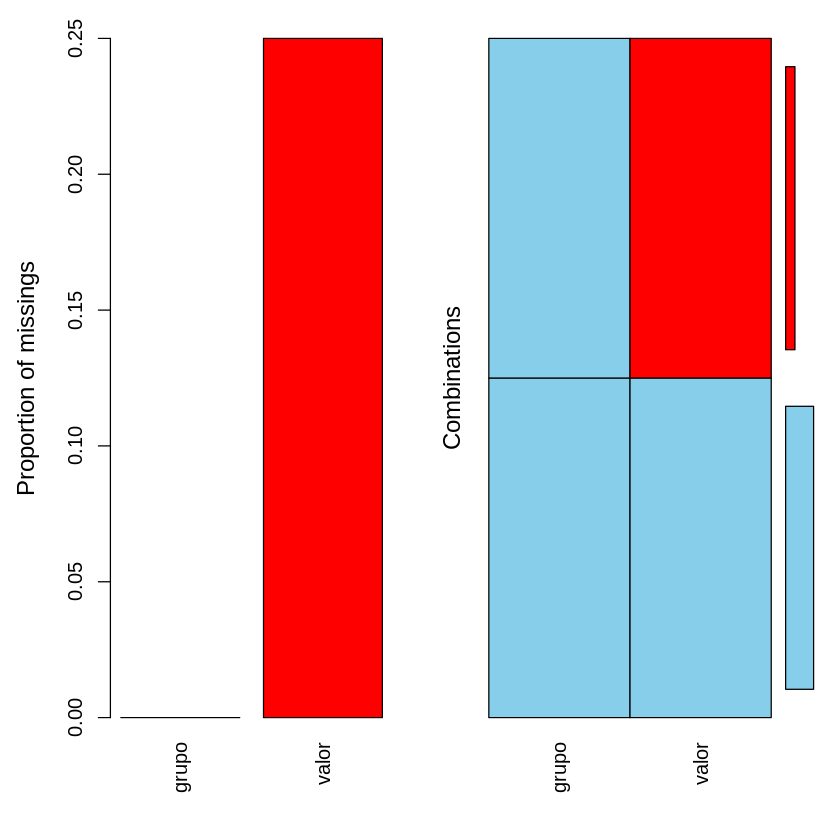

In [62]:
print(" -------   Muestra número y porcentaje de NA por variable. -------------")

miss_var_summary(df)

print("---- Muestra un gráfico de barras con la cantidad de valores faltantes por variable y patrones comunes. ---------")

aggr(df)

## Patrones de pérdida de datos

Los patrones describen *dónde* faltan los datos en el dataset. Los principales son:

<center>
 <img src="https://github.com/ednavivianasegura/AccesoImages/blob/main/datossinNA.png?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>


- **Univariado**: solo una variable tiene NA:

<center>
 <img src="https://github.com/ednavivianasegura/AccesoImages/blob/main/UnivariadoNA.png?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>

Solo una variable contiene valores faltantes; el resto de las variables están completamente observadas.
Suele ser el patrón más simple y fácil de manejar.

En este ejemplo vemos la variable Clase tiene valores faltantes. Generalmente es la variable dependiente la que tiene valores faltantes. Probablemente puede presentarse que la persona que clasificó por largo, ancho y forma, olvidó o pasó por alto clasificar esas dos.

- **Multivariado (general)**:

<center>
 <img src="https://github.com/ednavivianasegura/AccesoImages/blob/main/MultivariadoNA.png?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>


Varias variables contienen valores faltantes, sin seguir un orden estructurado. Es el patrón más común en la práctica.

Por ejemplo en un estudio poblacional, la edad, peso y ingresos tienen valores faltantes, pero distribuidos de forma irregular.

Suele representar más dificultad en la aplicación de algunos métodos clásicos (como imputación monótona).

Vemos en el ejemplo que, si se pierde en una variable, también se pierde en otra para el mismo inidviduo. Es decir, no es aleatorio, tiene un patrón, lo que es muy frecuente en las encuestas.

- **Monótono**: si hay NA en una variable, también en todas las siguientes.

<center>
 <img src="https://github.com/ednavivianasegura/AccesoImages/blob/main/MonotonoNA.png?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>

Hay un orden específico:
si una observación tiene un valor faltante en la variable Xj, entonces tendrá faltantes en todas las variables posteriores (Xj+1, Xj+2, ...).
Suele observarse en estudios longitudinales, estudios que se realizan a través del tiempo, es decir, podemos verlo como una acumulación de la pérdida de información.

Habitualmente, este patrón permite el uso de métodos de imputación secuenciales como regresión por pasos.

- **Arbitrario**: los valores faltantes aparecen en cualquier lugar, sin estructura visible ni lógica aparente. Es el caso más difícil de manejar y el más común. Son datos díficiles de manejar. Podemos pensarlo como que la probabilidad de que cada variable tenga un dato faltante, sea la misma para todas las variables.

<center>
 <img src="https://github.com/ednavivianasegura/AccesoImages/blob/main/GeneraNA.png?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>



Este patrón suele requerir de métodos de imputación más robustos, como imputación múltiple o modelos bayesianos.


### Mecanismos de pérdida de datos

Mientras que los patrones de pérdida describen dónde faltan los datos, los mecanismos de pérdida explican por qué faltan. Esta distinción es central en el enfoque de Little & Rubin (2002) y define si los métodos de tratamiento serán válidos o introducirán sesgos.

Se clasifican en tres tipos principales:

1. MCAR — Missing Completely At Random (pérdida completamente al azar)

La probabilidad de que un dato esté ausente es completamente aleatoria y no depende de ninguna variable observada ni no observada.

Por ejemplo:
Un sensor de temperatura falla esporádicamente debido a una interferencia eléctrica aleatoria.
El fallo no depende ni del valor real ni de ninguna otra variable.

Qué consecuencias puede traer este tipo de mecanismo:

- Es el caso más benigno.
- El análisis en los datos completos no introduce sesgo.
- Se pueden eliminar filas sin problema (listwise deletion, la veremos más adelante).
- Es poco frecuente en la práctica.

2. MAR — Missing At Random (pérdida al azar)

La probabilidad de que un dato falte depende de otras variables observadas, pero no del valor faltante en sí mismo.

Por ejemplo:
Los individuos con más dinero tienden a no reportar su nivel de ingreso.
→ El ingreso falta, pero depende de una variable observada (por ejemplo el estrato, cuyo valor si se tiene).

Qué consecuencias puede traer este tipo de mecanismo:

- Más realista y frecuente.
- El sesgo se puede corregir si incluimos las variables relacionadas en el modelo de imputación (como edad en este ejemplo).
- Métodos como imputación múltiple, regresión, o modelos con pesos son válidos.

3. MNAR — Missing Not At Random (Pérdida no al azar)

La probabilidad de que falte un dato depende del valor faltante en sí mismo.

Por ejemplo:
Personas con altos ingresos se niegan a declarar su salario por privacidad.
→ El dato falta precisamente porque es alto (digamos que también se naron a responder la pregunta relacionada con el estrato socioeconómico, por lo que estaría faltando, pero sabríamos porqué).
En resumen, este mecanismo de pérdida de información depende tanto de los datos observados como de los no observados (de los perdidos)

Qué consecuencias puede traer este tipo de mecanismo:

- Este es el caso más problemático.
- No se puede resolver solo con los datos disponibles.
- Se necesitan suposiciones fuertes, modelos de sensibilidad o diseño adicional (como encuestas complementarias).





### Ejemplo práctico:

<center>
 <img src="https://github.com/ednavivianasegura/AccesoImages/blob/main/collage-mamiferos-cabecera.jpg?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>

Veamos esto de una manera práctica con el dataset `sleep`. Este conjunto se basa en una recopilación de datos de sueño en mamíferos que apareció en el estudio R. M. Siegel (2005). Clues to the functions of mammalian sleep. Nature, 437(7063), 1264–1271. Cada fila representa una especie de mamífero. Y las variables describen: características biológicas (peso corporal, peso cerebral), comportamientos relacionados con el sueño (horas REM y no REM), estrategias de supervivencia (depredador, exposición al peligro) y riesgos ecológicos.

| Variable   | Tipo                | Descripción breve                                        |
| ---------- | ------------------- | -------------------------------------------------------- |
| `BodyWgt`  | numérico            | Peso corporal en kilogramos                              |
| `BrainWgt` | numérico            | Peso del cerebro en gramos                               |
| `NonD`     | numérico            | Horas de sueño no REM (sin movimientos oculares rápidos) |
| `Dream`    | numérico            | Horas de sueño REM (con sueños)                          |
| `Sleep`    | numérico            | Total de horas de sueño por día                          |
| `Span`     | numérico            | Esperanza de vida en años                                |
| `Gest`     | numérico            | Duración de la gestación en días                         |
| `Pred`     | categórica (factor) | ¿Es el animal un depredador? (categoría: sí/no)          |
| `Exp`      | categórica (factor) | ¿Está expuesto a peligro? (bajo, medio, alto)            |
| `Danger`   | numérico            | Nivel de peligro general (valor numérico del riesgo)     |



In [65]:
data(sleep)
# Ver dimensiones del dataset
dim(sleep)
 #Ver variables del dataset
str(sleep)

[1] 62 10

'data.frame':	62 obs. of  10 variables:
 $ BodyWgt : num  6654 1 3.38 0.92 2547 ...
 $ BrainWgt: num  5712 6.6 44.5 5.7 4603 ...
 $ NonD    : num  NA 6.3 NA NA 2.1 9.1 15.8 5.2 10.9 8.3 ...
 $ Dream   : num  NA 2 NA NA 1.8 0.7 3.9 1 3.6 1.4 ...
 $ Sleep   : num  3.3 8.3 12.5 16.5 3.9 9.8 19.7 6.2 14.5 9.7 ...
 $ Span    : num  38.6 4.5 14 NA 69 27 19 30.4 28 50 ...
 $ Gest    : num  645 42 60 25 624 180 35 392 63 230 ...
 $ Pred    : int  3 3 1 5 3 4 1 4 1 1 ...
 $ Exp     : int  5 1 1 2 5 4 1 5 2 1 ...
 $ Danger  : int  3 3 1 3 4 4 1 4 1 1 ...


In [67]:
data(sleep, package = "VIM")

Hacemos primero un análisis descriptivo

In [68]:
summary(sleep)

    BodyWgt            BrainWgt            NonD            Dream      
 Min.   :   0.005   Min.   :   0.14   Min.   : 2.100   Min.   :0.000  
 1st Qu.:   0.600   1st Qu.:   4.25   1st Qu.: 6.250   1st Qu.:0.900  
 Median :   3.342   Median :  17.25   Median : 8.350   Median :1.800  
 Mean   : 198.790   Mean   : 283.13   Mean   : 8.673   Mean   :1.972  
 3rd Qu.:  48.203   3rd Qu.: 166.00   3rd Qu.:11.000   3rd Qu.:2.550  
 Max.   :6654.000   Max.   :5712.00   Max.   :17.900   Max.   :6.600  
                                      NA's   :14       NA's   :12     
     Sleep            Span              Gest             Pred      
 Min.   : 2.60   Min.   :  2.000   Min.   : 12.00   Min.   :1.000  
 1st Qu.: 8.05   1st Qu.:  6.625   1st Qu.: 35.75   1st Qu.:2.000  
 Median :10.45   Median : 15.100   Median : 79.00   Median :3.000  
 Mean   :10.53   Mean   : 19.878   Mean   :142.35   Mean   :2.871  
 3rd Qu.:13.20   3rd Qu.: 27.750   3rd Qu.:207.50   3rd Qu.:4.000  
 Max.   :19.90   Max.   

Dentro del análisis inicial, es importante revisar la correlación entre las variables

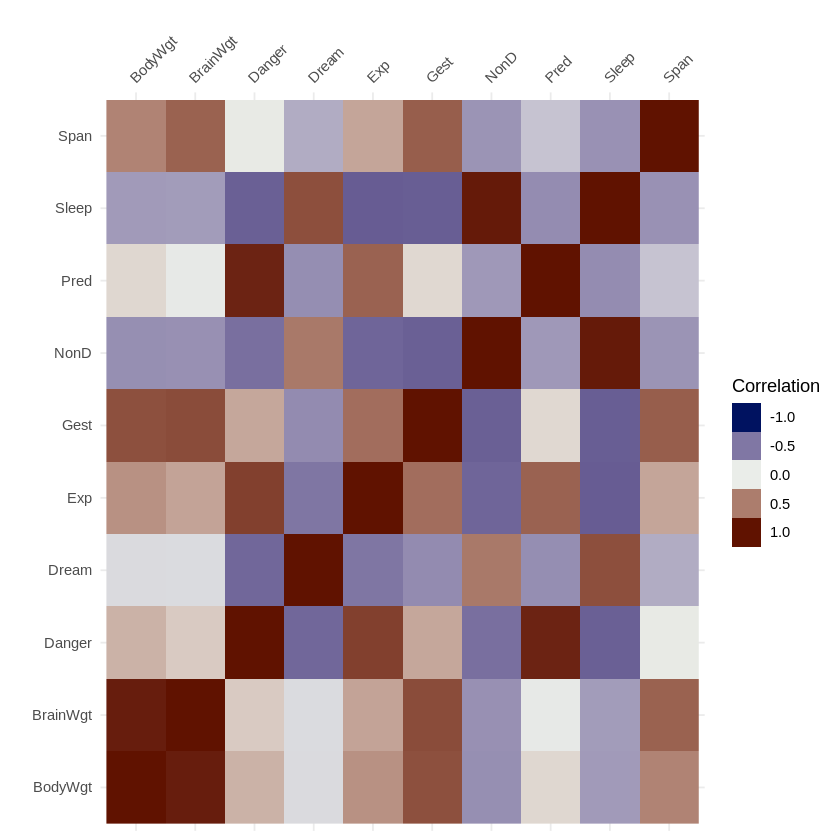

In [69]:
#Correlación (usa una función del paquete visdat para visualizar gráficamente una matriz de correlación entre las variables del dataset sleep:)
visdat::vis_cor(sleep, na_action = "complete.obs")
#El operador :: se utiliza para acceder a una función específica dentro de un paquete, sin necesidad de cargar todo el paquete con library().
#na_action = "complete.obs", indica cómo manejar los valores faltantes (NA) al calcular las correlaciones,
# significa que sólo se usan aquellas filas (observaciones) que no tienen ningún NA en ninguna de las variables consideradas.



Si existe algún tipo de correlación, nos facilita la tarea de estimar los datos faltantes de alguna manera más precisa.

A continuación visualizamos los datos faltantes:

In [73]:
?VIM::aggr

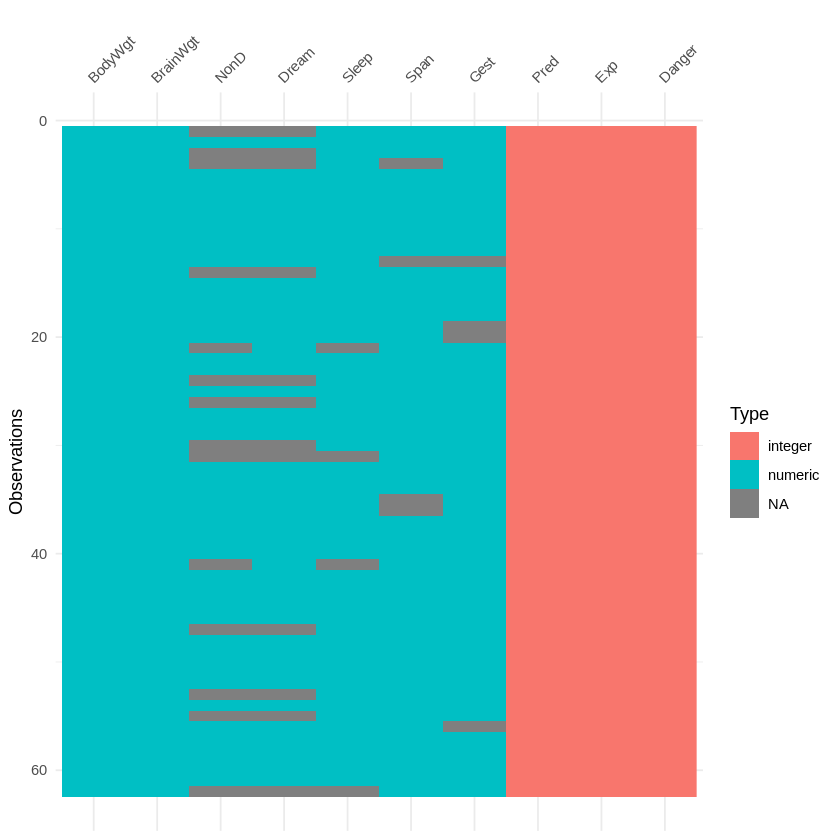

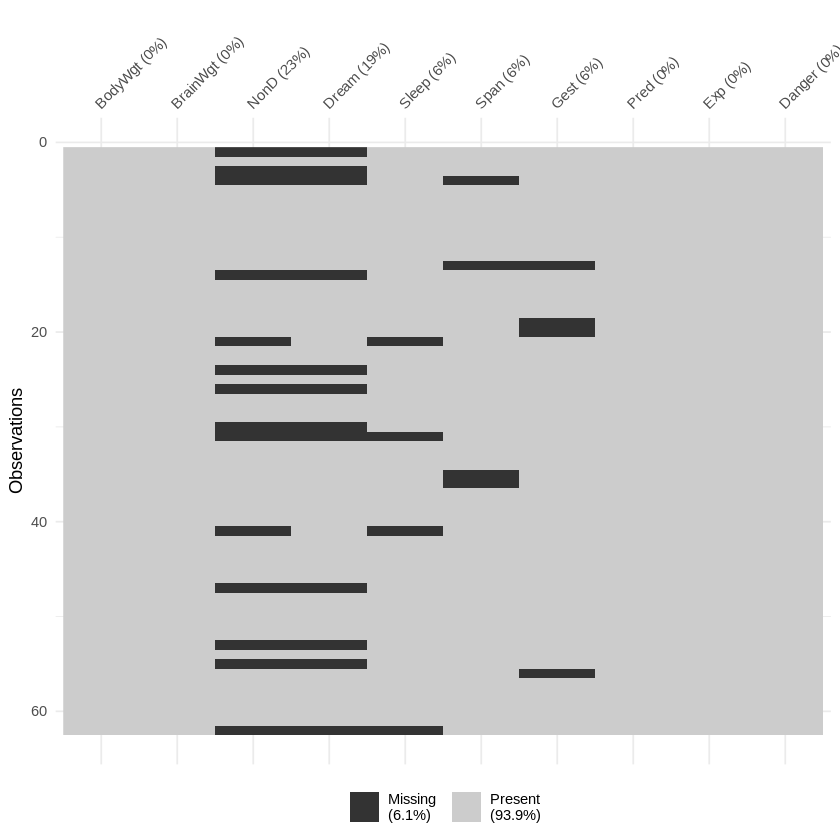


 Variables sorted by number of missings: 
 Variable      Count
     NonD 0.22580645
    Dream 0.19354839
    Sleep 0.06451613
     Span 0.06451613
     Gest 0.06451613
  BodyWgt 0.00000000
 BrainWgt 0.00000000
     Pred 0.00000000
      Exp 0.00000000
   Danger 0.00000000


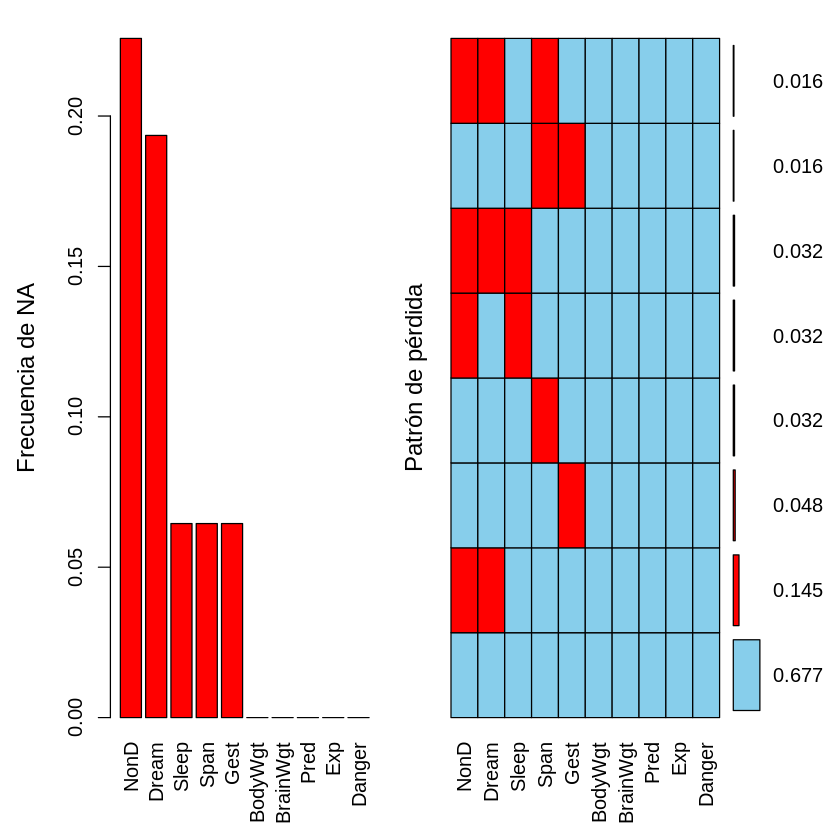

In [82]:
# Visualizar patrón general

#Gráficas
visdat::vis_dat(sleep, sort_type = FALSE)
#¿Qué hace?
# Genera un mapa visual del dataset, donde:
# Cada fila representa una observación.
# Cada columna representa una variable.
# Los colores indican el tipo de dato (numérico, carácter, lógico, NA, etc.).
# Argumento:
# sort_type = FALSE: mantiene el orden original de las variables.
# (Si fuera TRUE, ordenaría las columnas por tipo de dato.)
# ¿Para qué sirve?
# Ver de forma rápida qué variables tienen NA y de qué tipo son las demás.
# Identificar valores atípicos o inconsistencias de tipo (por ejemplo, una columna que debería ser numérica pero es carácter).


visdat::vis_miss(sleep)
#Este nos ayuda a identificar los patrones:
# A qué patrón parece?
# Vemos que cuando se pierde NonD, se pierde también Dream, si comprobamos
# la correlación, vemos que no es tan alta.
# Puede que sea una simple casualidad.

VIM::aggr(sleep, numbers = TRUE, sortVars = TRUE, gap = 3,prop = TRUE,
     ylab = c("Frecuencia de NA", "Patrón de pérdida"))


#Produce una visualización compuesta que incluye:
# Un histograma con el porcentaje de valores faltantes por variable (izquierda).
# Una matriz de combinaciones de ausencia/presencia entre variables (derecha).
# Argumentos clave:
#numbers = TRUE: muestra los valores numéricos sobre las barras.
#sortVars = TRUE: ordena las variables de mayor a menor porcentaje de NA.
#gap = 3: espacio entre los gráficos izquierdo y derecho.
#prop = TRUE: muestra proporciones en lugar de conteo absoluto.
#ylab: etiquetas personalizadas del eje y.
#¿Para qué sirve?
#Diagnóstico visual completo del patrón de pérdida de datos
# Permite ver cómo esta la proporción de pérdida en cada una de las variables.
#Permite detectar si hay correlaciones entre variables faltantes (por ejemplo, cuando dos columnas tienden a estar ausentes juntas).

# También útil: matriz de patrones
#VIM::matrixplot(sleep, sortby = 2)




¿Qué podemos ver aquí?

Gráfico aggr() — Frecuencia y patrón de pérdida
Este gráfico tiene dos componentes:

- A la izquierda: barras verticales rojas
Representan el porcentaje de valores faltantes por variable.

De acuerdo con la tabla y el gráfico de barras:

| Variable | % NA   | Significado                                               |
|----------|--------|------------------------------------------------------------|
| NonD     | 22.6%  | Horas de sueño no REM faltantes en 22.6%                   |
| Dream    | 19.4%  | Horas de sueño REM faltantes en 19.4%                      |
| Sleep    | 6.5%   | Total de horas de sueño faltantes                          |
| Span     | 6.5%   | Esperanza de vida faltante                                 |
| Gest     | 6.5%   | Días de gestación faltantes                                |
| Resto    | 0%     | Completas: sin valores faltantes                           |


Vemos entonces que el mayor problema está en las variables NonD y Dream.

- A la derecha: matriz de patrones de NA
Cada columna representa una variable.

Cada fila representa una combinación específica de presencia/ausencia de datos en una observación.

Rojo = valor faltante | Azul = valor presente

¿Qué observamos?

Hay una gran cantidad de combinaciones diferentes de valores faltantes, lo que sugiere un patrón de pérdida general (arbitrario), no monótono.

Concretamente:

- Fila completamente azul con valor 0,67, indica que todas las variables están presentes (sin NA).
Es decir, ese patrón representa las observaciones completas o casos completos: Valor 0,67: significa que el 67% de las observaciones del dataset están completas, es decir, no tienen ningún valor faltante en ninguna variable.
Por lo tanto, en el dataset sleep con 62 observaciones, esto corresponde a aproximadamente 42 observaciones completas (62*0,67)

- Algunas observaciones tienen múltiples NA; otras tienen uno solo, por ejemplo:

Fila con rojo solo en Gest y valor 0,048, representa el patrón en el que solo falta la variable Gest, el resto de variables está presente. El valor 0,048: implica que el 4.8% de las observaciones tienen NA únicamente en Gest (0,048*65 aprox 3 observaciones).



In [83]:
#Información de número de datos faltantes totales y de la posición
empire::count_miss(data = sleep) #Número de datos faltantes
empire::pos_miss(data = sleep) #Posición fila-columna de los datos faltantes

[1] 38

,Row,Col
,<int>,<dbl>
1,1,3
2,3,3
3,4,3
4,14,3
5,21,3
6,24,3
7,26,3
8,30,3
9,31,3
